### 얼굴 데이터셋으로 군집 알고리즘 비교

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

In [5]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask= np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
  mask[np.where(people.target==target)[0][:50]] =1
    
x_people = people.data[mask]
y_people = people.target[mask]

x_people = x_people/255.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0)
x_pca = pca.fit_transform(x_people)

### DBSCAN

In [15]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(x_pca)
print('고유한 레이블 :', np.unique(labels)) # 노이즈 데이터 생김

고유한 레이블 : [-1  0]


In [17]:
print('클러스터별 포인트 수 :', np.bincount(labels+1))
# 노이즈 데이터가 32개 생겼다

클러스터별 포인트 수 : [  32 2031]


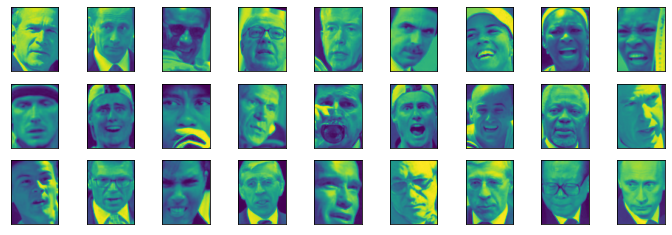

In [18]:
noise = x_people[labels==-1]

fig, axes = plt.subplots(3,9, subplot_kw={'xticks':(), 'yticks':()}, figsize=(12,4))

for image, ax in zip(noise, axes.ravel()):
  ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [20]:
for eps in [1,3,5,7,9,11,13] :
  print('\neps =', eps)
  dbscan = DBSCAN(eps=eps, min_samples=3)
  labels = dbscan.fit_predict(x_pca)
  print('클러스터 수 :', len(np.unique(labels)))
  print('클러스터 크기 :', np.bincount(labels+1))


eps = 1
클러스터 수 : 1
클러스터 크기 : [2063]

eps = 3
클러스터 수 : 1
클러스터 크기 : [2063]

eps = 5
클러스터 수 : 1
클러스터 크기 : [2063]

eps = 7
클러스터 수 : 14
클러스터 크기 : [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps = 9
클러스터 수 : 4
클러스터 크기 : [1307  750    3    3]

eps = 11
클러스터 수 : 2
클러스터 크기 : [ 413 1650]

eps = 13
클러스터 수 : 2
클러스터 크기 : [ 120 1943]


### K-Means

In [21]:
n_clusters = 10

km = KMeans(n_clusters = n_clusters, random_state=0)
labels_km = km.fit_predict(x_pca)
print('KMeans 클러스터 크기 : ', np.bincount(labels_km))

KMeans 클러스터 크기 :  [155 175 238  75 358 257  91 219 323 172]


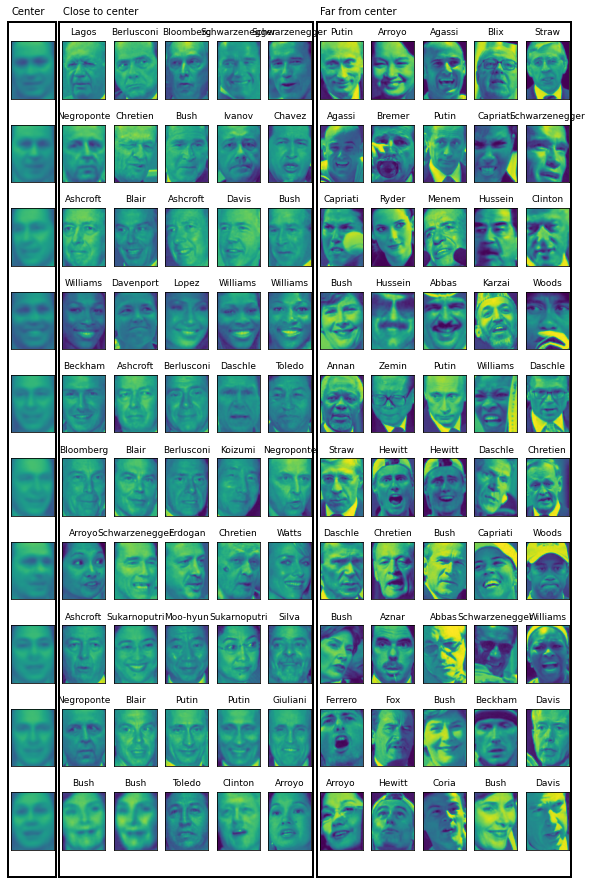

In [22]:
mglearn.plots.plot_kmeans_faces(km, pca, x_pca, x_people, y_people, people.target_names)

### 계층적 군집으로 얼굴 분석

In [23]:
agg = AgglomerativeClustering(n_clusters=10)
labels_agg = agg.fit_predict(x_pca)

print('군집의 클러스터 크기 :', np.bincount(labels_agg))

군집의 클러스터 크기 : [169 660 144 329 217  85  18 261  31 149]


In [25]:
from sklearn.metrics.cluster import adjusted_rand_score

In [26]:
print('ARI : {:.2f}'.format(adjusted_rand_score(labels_agg, labels_km)))

ARI : 0.09


c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib

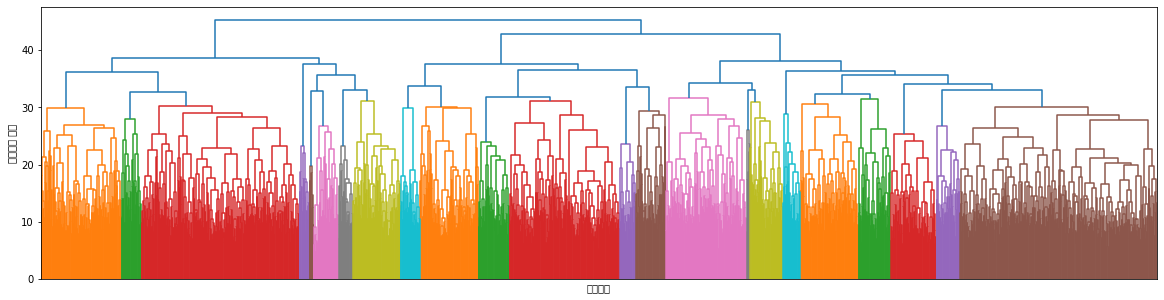

In [27]:
linkage_array = ward(x_pca) # 클러스터 사이의 거리가 담겨져 있음

plt.figure(figsize=(20,5))
dendrogram(linkage_array, p=7, no_labels=True)
plt.xlabel('샘플번호')
plt.ylabel('클러스터 거리')
plt.show()

c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib

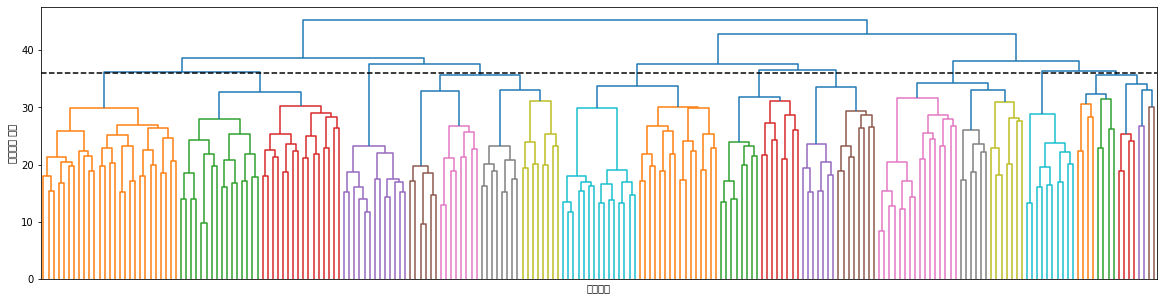

In [28]:
linkage_array = ward(x_pca) # 클러스터 사이의 거리가 담겨져 있음

plt.figure(figsize=(20,5))
dendrogram(linkage_array, p=7, truncate_mode = 'level', no_labels=True)
plt.xlabel('샘플번호')
plt.ylabel('클러스터 거리')

ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [36,36], '--', c='k')

plt.show()